In [ ]:
# google drive. so we have to monunt
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import PIL.Image as Image
import os

In [ ]:
!unzip /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/extraimages.zip -d /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/extraimages/extra-image-11676.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/__MACOSX/extraimages/._extra-image-11676.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/extraimages/extra-image-10568.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/__MACOSX/extraimages/._extra-image-10568.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/extraimages/extra-image-8018.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/__MACOSX/extraimages/._extra-image-8018.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/extraimages/extra-image-14726.jpg  
  inflating: /co

In [ ]:
!unzip /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/train.zip -d /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset
!unzip /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/test.zip -d /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/test/0/test-img-2283.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/__MACOSX/test/0/._test-img-2283.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/test/0/test-img-977.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/__MACOSX/test/0/._test-img-977.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/test/0/test-img-787.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/__MACOSX/test/0/._test-img-787.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/test/0/test-img-793.jpg  
  inflating: /content/drive/MyDrive/project/MachineLearning/dataset/cassava_classi

In [ ]:
#reading image values in pixels width * hight * channels
ext = ['jpg', 'jpeg']    # Add image formats here
data = []
labels = []

files = []
imdir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train/cbb'
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
data.extend([cv2.imread(file) for file in files])
labels.extend(["cbb" for file in files])


In [ ]:
files = []
imdir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train/cbsd'
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
data = np.concatenate([data, [cv2.imread(file) for file in files]])
labels.extend(["cbsd" for file in files])


In [ ]:
files = []
imdir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train/cgm'
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
data = np.concatenate([data, [cv2.imread(file) for file in files]])
labels.extend(["cgm" for file in files])


In [ ]:
files = []
imdir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train/cmd'
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
data = np.concatenate([data, [cv2.imread(file) for file in files]])
labels.extend(["cmd" for file in files])

In [ ]:
files = []
imdir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train/healthy'
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
data = np.concatenate([data, [cv2.imread(file) for file in files]])
labels.extend(["healthy" for file in files])


In [ ]:
size = (300, 300)
data = np.array([cv2.resize(d, size, interpolation = cv2.INTER_AREA) for d in data])

In [ ]:
labels = np.array(labels)

In [ ]:
lr = [np.fliplr(data[i]) for i in range(len(data))]
labels_lr = [labels[i] for i in range(len(labels))]

In [ ]:
data = np.concatenate([data, lr])
labels = np.concatenate([labels, labels_lr])

In [ ]:
labels = np.array(labels)
labels = pd.get_dummies(labels)
X_train = data
Y_train = labels

In [ ]:
#using real test data
testData = []
files = []
imdir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/test/0'
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
testData.extend([cv2.imread(file) for file in files])

size = (300, 300)
testData = [cv2.resize(d, size, interpolation = cv2.INTER_AREA) for d in testData]

X_train = data
Y_train = labels
X_test = np.array(testData)
testLabels = files

In [ ]:
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
input_shape = ((300, 300, 3))
X_input = Input(input_shape)
    

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Nadam, Adadelta, Adam, Adadelta, Adagrad, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_path = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'   # cmd, healthy, cgm, cbsd, cbb 2658+316+773+1443+466 == 6122
test_path = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/test/0'
print(len(os.listdir(train_path)))
print(len(os.listdir(test_path)))

6
3774


In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 70 # batch size 70
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [ ]:
history = model.fit_generator(train_generator,
                             epochs=30,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator #epoch30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/30
61/61 [==============================] - 1512s 25s/step - loss: 1.4025 - accuracy: 0.4566 - val_loss: 1.3603 - val_accuracy: 0.4703
Epoch 2/30
61/61 [==============================] - 256s 4s/step - loss: 1.3303 - accuracy: 0.4746 - val_loss: 1.2653 - val_accuracy: 0.5602
Epoch 3/30
61/61 [==============================] - 253s 4s/step - loss: 1.2807 - accuracy: 0.5144 - val_loss: 1.1860 - val_accuracy: 0.5623
Epoch 4/30
61/61 [==============================] - 249s 4s/step - loss: 1.2369 - accuracy: 0.5408 - val_loss: 1.1314 - val_accuracy: 0.5914
Epoch 5/30
61/61 [==============================] - 253s 4s/step - loss: 1.2066 - accuracy: 0.5521 - val_loss: 1.1448 - val_accuracy: 0.5779
Epoch 6/30
61/61 [==============================] - 248s 4s/step - loss: 1.1921 - accuracy: 0.5655 - val_loss: 1.1639 - val_accuracy: 0.5517
Epoch 7/30
61/61 [==============================] - 254s 4s/step - loss: 1.1613 - accuracy: 0.5686 - val_loss: 1.1443 - val_accuracy: 0.5857
Epoch 8/30


In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

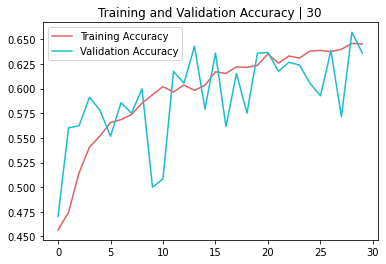

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, color ='#e35f62', label='Training Accuracy')
plt.plot(epochs, val_acc, '#17becf', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | 30')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

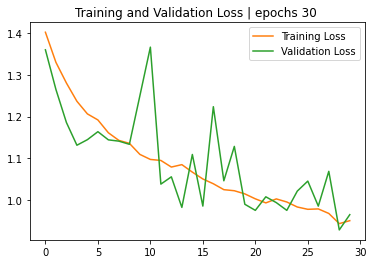

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, '#ff7f0e', label = 'Training Loss')
plt.plot(epochs, val_loss, '#2ca02c', label = 'Validation Loss')
plt.title('Training and Validation Loss | epochs 30 ')
plt.legend()
plt.figure()

In [ ]:
train_image_path = "/kaggle/input/cassava-leaf-disease-classification/train_images/"
test_image_path = "/kaggle/input/cassava-leaf-disease-classification/test_images/"

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 70 # batch size 70
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the learning rate 0.01

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 16)      

In [ ]:
## epochs 30
history2 = model.fit_generator(train_generator,
                             epochs=30,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator #epoch 30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
61/61 [==============================] - 260s 4s/step - loss: 75.9620 - accuracy: 0.4425 - val_loss: 1.3432 - val_accuracy: 0.4703
Epoch 2/30
61/61 [==============================] - 249s 4s/step - loss: 1.3489 - accuracy: 0.4698 - val_loss: 1.3463 - val_accuracy: 0.4703
Epoch 3/30
61/61 [==============================] - 251s 4s/step - loss: 1.3501 - accuracy: 0.4698 - val_loss: 1.3451 - val_accuracy: 0.4703
Epoch 4/30
61/61 [==============================] - 258s 4s/step - loss: 1.3484 - accuracy: 0.4698 - val_loss: 1.3425 - val_accuracy: 0.4703
Epoch 5/30
61/61 [==============================] - 251s 4s/step - loss: 1.3485 - accuracy: 0.4698 - val_loss: 1.3422 - val_accuracy: 0.4703
Epoch 6/30
61/61 [==============================] - 250s 4s/step - loss: 1.3473 - accuracy: 0.4698 - val_loss: 1.3425 - val_accuracy: 0.4703
Epoch 7/30
61/61 [==============================] - 250s 4s/step - loss: 1.3482 - accuracy: 0.4698 - val_loss: 1.3442 - val_accuracy: 0.4703
Epoch 8/30
6

In [ ]:
# overfitting /I think 
import matplotlib.pyplot as plt
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(len(acc2))

<Figure size 432x288 with 0 Axes>

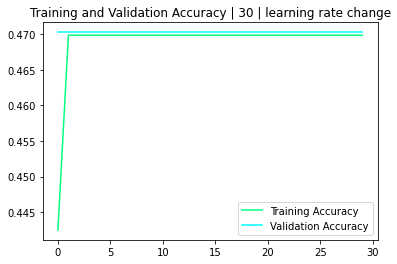

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc2, color ='springgreen', label='Training Accuracy')
plt.plot(epochs, val_acc2, 'aqua', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | 30 | learning rate change')
plt.legend()
plt.figure()

This Model is overfitting...


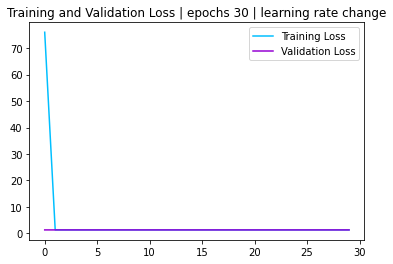

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss2, 'deepskyblue', label = 'Training Loss')
plt.plot(epochs, val_loss2, 'darkviolet', label = 'Validation Loss')
plt.title('Training and Validation Loss | epochs 30 | learning rate change')
plt.legend()
plt.figure()

print("This Model is overfitting...")

In [ ]:
# learning rate... 0.01보다.. 

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 30 # batch size 30 
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.03), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the learning rate 0.03 / 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 16)      

In [ ]:
## epochs 30 , learning rate 0.03
history2 = model.fit_generator(train_generator,
                             epochs=30,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator #epoch 30 -> overfitting ...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
142/142 [==============================] - 250s 2s/step - loss: 7380.1226 - accuracy: 0.4623 - val_loss: 1.3497 - val_accuracy: 0.4703
Epoch 2/30
142/142 [==============================] - 246s 2s/step - loss: 1.3522 - accuracy: 0.4684 - val_loss: 1.3598 - val_accuracy: 0.4703
Epoch 3/30
142/142 [==============================] - 244s 2s/step - loss: 1.3502 - accuracy: 0.4698 - val_loss: 1.3454 - val_accuracy: 0.4703
Epoch 4/30
142/142 [==============================] - 246s 2s/step - loss: 1.3460 - accuracy: 0.4698 - val_loss: 1.3436 - val_accuracy: 0.4703
Epoch 5/30
142/142 [==============================] - 245s 2s/step - loss: 1.3458 - accuracy: 0.4698 - val_loss: 1.3442 - val_accuracy: 0.4703
Epoch 6/30
142/142 [==============================] - 245s 2s/step - loss: 1.3451 - accuracy: 0.4698 - val_loss: 1.3437 - val_accuracy: 0.4703
Epoch 7/30
142/142 [==============================] - 245s 2s/step - loss: 1.3456 - accuracy: 0.4698 - val_loss: 1.3425 - val_accuracy: 0.4

KeyboardInterrupt: ignored

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 30 # batch size 30 / learning rate 0.001
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the 0.001 again because of overfitting / batch size 30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
## epochs 30 , learning rate 0.001
history3 = model.fit_generator(train_generator,
                             epochs=30,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator #epoch 30 -> overfitting ...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
142/142 [==============================] - 2264s 16s/step - loss: 1.4178 - accuracy: 0.4663 - val_loss: 1.3236 - val_accuracy: 0.4703
Epoch 2/30
142/142 [==============================] - 237s 2s/step - loss: 1.3058 - accuracy: 0.4960 - val_loss: 1.2506 - val_accuracy: 0.5007
Epoch 3/30
142/142 [==============================] - 234s 2s/step - loss: 1.2295 - accuracy: 0.5325 - val_loss: 1.1254 - val_accuracy: 0.5928
Epoch 4/30
142/142 [==============================] - 238s 2s/step - loss: 1.1941 - accuracy: 0.5627 - val_loss: 1.3001 - val_accuracy: 0.5135
Epoch 5/30
142/142 [==============================] - 235s 2s/step - loss: 1.1519 - accuracy: 0.5775 - val_loss: 1.2298 - val_accuracy: 0.5574
Epoch 6/30
142/142 [==============================] - 235s 2s/step - loss: 1.1348 - accuracy: 0.5891 - val_loss: 1.0875 - val_accuracy: 0.6098
Epoch 7/30
142/142 [==============================] - 238s 2s/step - loss: 1.1107 - accuracy: 0.5931 - val_loss: 1.0565 - val_accuracy: 0.60

In [ ]:
# overfitting /I think 
import matplotlib.pyplot as plt
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(len(acc3))

<Figure size 432x288 with 0 Axes>

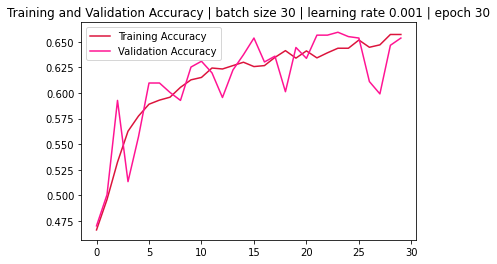

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc3, color ='crimson', label='Training Accuracy')
plt.plot(epochs, val_acc3, 'deeppink', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | batch size 30 | learning rate 0.001 | epoch 30' )
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

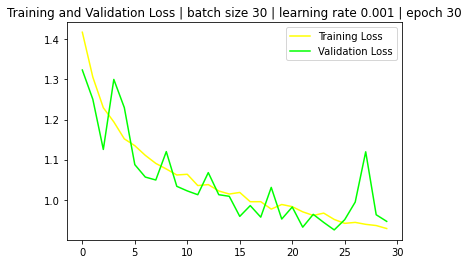

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss3, 'yellow', label = 'Training Loss')
plt.plot(epochs, val_loss3, 'lime', label = 'Validation Loss')
plt.title('Training and Validation Loss | batch size 30 | learning rate 0.001 | epoch 30')
plt.legend()
plt.figure()

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 10 # batch size 10
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the 0.001 again because of overfitting / batch size 10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
## epochs 30 , learning rate 0.001, batch size 10
history3 = model.fit_generator(train_generator,
                             epochs=30,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator #epoch 30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
425/425 [==============================] - 251s 587ms/step - loss: 1.3534 - accuracy: 0.4779 - val_loss: 1.3701 - val_accuracy: 0.4901
Epoch 2/30
425/425 [==============================] - 248s 584ms/step - loss: 1.2308 - accuracy: 0.5450 - val_loss: 1.2705 - val_accuracy: 0.5375
Epoch 3/30
425/425 [==============================] - 248s 582ms/step - loss: 1.1754 - accuracy: 0.5705 - val_loss: 1.0878 - val_accuracy: 0.5970
Epoch 4/30
425/425 [==============================] - 249s 586ms/step - loss: 1.1555 - accuracy: 0.5884 - val_loss: 1.0685 - val_accuracy: 0.6069
Epoch 5/30
425/425 [==============================] - 246s 579ms/step - loss: 1.1212 - accuracy: 0.5997 - val_loss: 1.1606 - val_accuracy: 0.5843
Epoch 6/30
425/425 [==============================] - 246s 578ms/step - loss: 1.0921 - accuracy: 0.6030 - val_loss: 1.0790 - val_accuracy: 0.6020
Epoch 7/30
425/425 [==============================] - 244s 574ms/step - loss: 1.0776 - accuracy: 0.6072 - val_loss: 1.0801 -

In [ ]:
# overfitting /I think 
import matplotlib.pyplot as plt
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(len(acc3))

<Figure size 432x288 with 0 Axes>

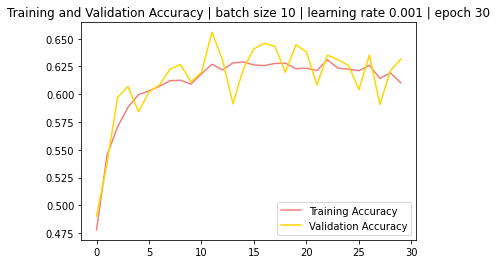

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc3, color ='lightcoral', label='Training Accuracy')
plt.plot(epochs, val_acc3, color ='gold', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | batch size 10 | learning rate 0.001 | epoch 30' )
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

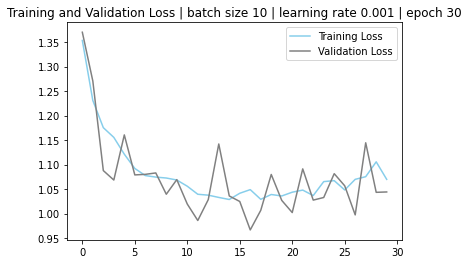

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss3, 'skyblue', label = 'Training Loss')
plt.plot(epochs, val_loss3, 'gray', label = 'Validation Loss')
plt.title('Training and Validation Loss | batch size 10 | learning rate 0.001 | epoch 30')
plt.legend()
plt.figure()

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 30 # batch size 30 
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the 0.001 again because of overfitting / batch size 30 / epoch 50

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
## epochs 50 , learning rate 0.001, batch size 30
history4 = model.fit_generator(train_generator,
                             epochs= 50,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator #epoch 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
142/142 [==============================] - 235s 2s/step - loss: 1.3502 - accuracy: 0.4708 - val_loss: 1.2673 - val_accuracy: 0.4915
Epoch 2/50
142/142 [==============================] - 236s 2s/step - loss: 1.2686 - accuracy: 0.5156 - val_loss: 1.1817 - val_accuracy: 0.5517
Epoch 3/50
142/142 [==============================] - 231s 2s/step - loss: 1.2142 - accuracy: 0.5469 - val_loss: 1.1822 - val_accuracy: 0.5701
Epoch 4/50
142/142 [==============================] - 229s 2s/step - loss: 1.1635 - accuracy: 0.5716 - val_loss: 1.5461 - val_accuracy: 0.4880
Epoch 5/50
142/142 [==============================] - 229s 2s/step - loss: 1.1589 - accuracy: 0.5782 - val_loss: 1.1376 - val_accuracy: 0.5595
Epoch 6/50
142/142 [==============================] - 228s 2s/step - loss: 1.1348 - accuracy: 0.5888 - val_loss: 1.1338 - val_accuracy: 0.5708
Epoch 7/50
142/142 [==============================] - 228s 2s/step - loss: 1.1095 - accuracy: 0.5961 - val_loss: 1.1212 - val_accuracy: 0.6041

In [ ]:
import matplotlib.pyplot as plt
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc4))

<Figure size 432x288 with 0 Axes>

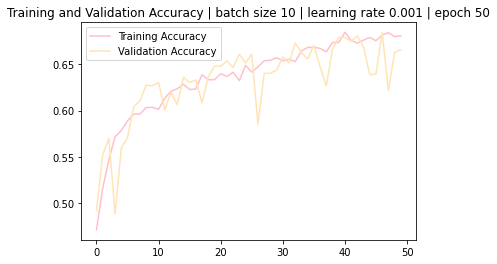

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc4, color ='pink', label='Training Accuracy')
plt.plot(epochs, val_acc4, color ='moccasin', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | batch size 10 | learning rate 0.001 | epoch 50' )
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

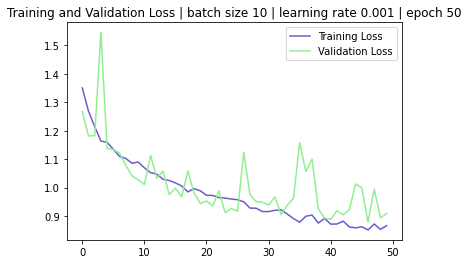

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss4, color ='slateblue', label = 'Training Loss')
plt.plot(epochs, val_loss4, color = 'lightgreen', label = 'Validation Loss')
plt.title('Training and Validation Loss | batch size 10 | learning rate 0.001 | epoch 50')
plt.legend()
plt.figure()

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 30 # batch size 30 , learning rate 0.001
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the 0.001 again because of overfitting / batch size 30 / epoch 100

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
## epochs 100 , learning rate 0.001, batch size 30
history5 = model.fit_generator(train_generator,
                             epochs= 100,
                             verbose=1,
                             validation_data=validation_generator) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
142/142 [==============================] - 1518s 11s/step - loss: 1.3511 - accuracy: 0.4731 - val_loss: 1.2203 - val_accuracy: 0.5184
Epoch 2/100
142/142 [==============================] - 244s 2s/step - loss: 1.2571 - accuracy: 0.5247 - val_loss: 1.1661 - val_accuracy: 0.5595
Epoch 3/100
142/142 [==============================] - 247s 2s/step - loss: 1.2051 - accuracy: 0.5608 - val_loss: 1.1042 - val_accuracy: 0.6013
Epoch 4/100
142/142 [==============================] - 245s 2s/step - loss: 1.1669 - accuracy: 0.5728 - val_loss: 1.0854 - val_accuracy: 0.6084
Epoch 5/100
142/142 [==============================] - 246s 2s/step - loss: 1.1426 - accuracy: 0.5853 - val_loss: 1.1464 - val_accuracy: 0.5864
Epoch 6/100
142/142 [==============================] - 251s 2s/step - loss: 1.1243 - accuracy: 0.5926 - val_loss: 1.0610 - val_accuracy: 0.6211
Epoch 7/100
142/142 [==============================] - 247s 2s/step - loss: 1.1102 - accuracy: 0.5978 - val_loss: 1.0281 - val_accurac

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 30 # batch size 30 , learning rate 0.001
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the 0.001 again because of overfitting / batch size 30 / epoch 100

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [ ]:
## epochs 100 , learning rate 0.001, batch size 30
history5 = model.fit_generator(train_generator,
                             epochs= 100,
                             verbose=1,
                             validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
142/142 [==============================] - 1494s 11s/step - loss: 1.4133 - accuracy: 0.4680 - val_loss: 1.2655 - val_accuracy: 0.4972
Epoch 2/100
142/142 [==============================] - 266s 2s/step - loss: 1.2720 - accuracy: 0.5174 - val_loss: 1.1708 - val_accuracy: 0.5836
Epoch 3/100
142/142 [==============================] - 264s 2s/step - loss: 1.2136 - accuracy: 0.5492 - val_loss: 1.1888 - val_accuracy: 0.5729
Epoch 4/100
142/142 [==============================] - 262s 2s/step - loss: 1.1747 - accuracy: 0.5695 - val_loss: 1.1424 - val_accuracy: 0.5970
Epoch 5/100
142/142 [==============================] - 255s 2s/step - loss: 1.1391 - accuracy: 0.5820 - val_loss: 1.0779 - val_accuracy: 0.6190
Epoch 6/100
142/142 [==============================] - 249s 2s/step - loss: 1.1252 - accuracy: 0.5867 - val_loss: 1.0934 - val_accuracy: 0.6126
Epoch 7/100
142/142 [==============================] - 247s 2s/step - loss: 1.1031 - accuracy: 0.6011 - val_loss: 1.1098 - val_accurac

In [ ]:
## epochs 100 , learning rate 0.001, batch size 30
history5 = model.fit_generator(train_generator,
                             epochs= 100,
                             verbose=1,
                             validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
142/142 [==============================] - 2185s 15s/step - loss: 1.3860 - accuracy: 0.4694 - val_loss: 1.2526 - val_accuracy: 0.5078
Epoch 2/100
142/142 [==============================] - 241s 2s/step - loss: 1.2753 - accuracy: 0.5191 - val_loss: 1.2237 - val_accuracy: 0.5708
Epoch 3/100
142/142 [==============================] - 241s 2s/step - loss: 1.2162 - accuracy: 0.5521 - val_loss: 1.1337 - val_accuracy: 0.5744
Epoch 4/100
142/142 [==============================] - 241s 2s/step - loss: 1.1935 - accuracy: 0.5601 - val_loss: 1.0884 - val_accuracy: 0.6055
Epoch 5/100
142/142 [==============================] - 241s 2s/step - loss: 1.1513 - accuracy: 0.5712 - val_loss: 1.0801 - val_accuracy: 0.6246
Epoch 6/100
142/142 [==============================] - 240s 2s/step - loss: 1.1337 - accuracy: 0.5910 - val_loss: 1.0551 - val_accuracy: 0.6176
Epoch 7/100
142/142 [==============================] - 240s 2s/step - loss: 1.1116 - accuracy: 0.5921 - val_loss: 1.1600 - val_accurac

In [ ]:
# image 
import matplotlib.pyplot as plt
acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(len(acc5))

<Figure size 432x288 with 0 Axes>

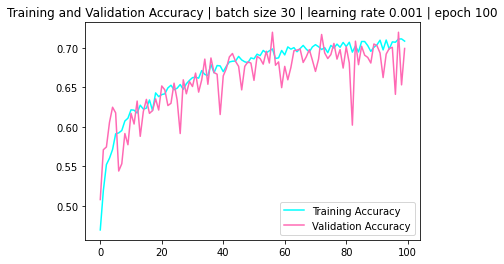

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc5, color ='cyan', label='Training Accuracy')
plt.plot(epochs, val_acc5, color ='hotpink', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | batch size 30 | learning rate 0.001 | epoch 100' )
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

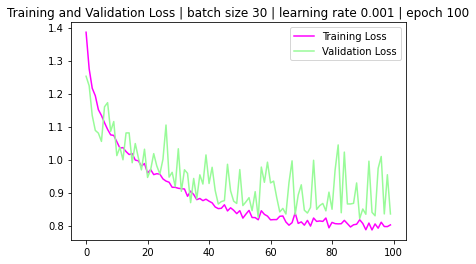

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss5, color ='magenta', label = 'Training Loss')
plt.plot(epochs, val_loss5, color = 'palegreen', label = 'Validation Loss')
plt.title('Training and Validation Loss | batch size 30 | learning rate 0.001 | epoch 100')
plt.legend()
plt.figure()

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 30 # batch size 30
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (220, 220),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (220, 220),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the 0.001 again because of overfitting / batch size 30 / epoch 100

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 218, 218, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 109, 109, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 107, 107, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 51, 51, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 16)      

In [ ]:
## epochs 30 , learning rate 0.001, batch size 30 | size 220 * 220
history6 = model.fit_generator(train_generator,
                             epochs= 30,
                             verbose=1,
                             validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
142/142 [==============================] - 2096s 15s/step - loss: 1.3822 - accuracy: 0.4630 - val_loss: 1.2980 - val_accuracy: 0.5361
Epoch 2/30
142/142 [==============================] - 469s 3s/step - loss: 1.2786 - accuracy: 0.5113 - val_loss: 1.1937 - val_accuracy: 0.5836
Epoch 3/30
142/142 [==============================] - 469s 3s/step - loss: 1.2168 - accuracy: 0.5535 - val_loss: 1.1869 - val_accuracy: 0.5552
Epoch 4/30
142/142 [==============================] - 473s 3s/step - loss: 1.1764 - accuracy: 0.5705 - val_loss: 1.0901 - val_accuracy: 0.5914
Epoch 5/30
142/142 [==============================] - 470s 3s/step - loss: 1.1395 - accuracy: 0.5780 - val_loss: 1.0885 - val_accuracy: 0.5963
Epoch 6/30
142/142 [==============================] - 484s 3s/step - loss: 1.1146 - accuracy: 0.5893 - val_loss: 1.2064 - val_accuracy: 0.5453
Epoch 7/30
142/142 [==============================] - 478s 3s/step - loss: 1.0976 - accuracy: 0.6041 - val_loss: 1.0526 - val_accuracy: 0.60

In [ ]:
# image 
import matplotlib.pyplot as plt
acc6 = history6.history['accuracy']
val_acc6 = history6.history['val_accuracy']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs = range(len(acc6))

<Figure size 432x288 with 0 Axes>

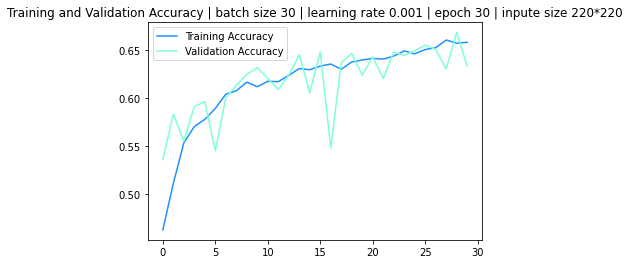

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc6, color ='dodgerblue', label='Training Accuracy')
plt.plot(epochs, val_acc6, color ='aquamarine', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | batch size 30 | learning rate 0.001 | epoch 30 | inpute size 220*220' )
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

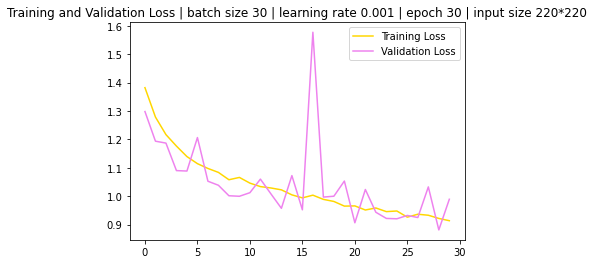

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss6, color ='gold', label = 'Training Loss')
plt.plot(epochs, val_loss6, color = 'violet', label = 'Validation Loss')
plt.title('Training and Validation Loss | batch size 30 | learning rate 0.001 | epoch 30 | input size 220*220')
plt.legend()
plt.figure()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
split_size = 4897 #80-20
BATCH_SIZE = 30 # batch size 30
train_dir = '/content/drive/MyDrive/project/MachineLearning/dataset/cassava_classifier/dataset/train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (220, 220),
    shuffle = True,
    subset = 'training'
)

Found 4244 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (220, 220),
    shuffle = True,
    subset = 'validation'
)

Found 1412 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# before learning rate 0.001 but I chage the 0.001 again because of overfitting / batch size 30 / epoch 100

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
#keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004) 
# Adamax
# keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 16)       0

In [ ]:
## epochs 30 , learning rate 0.001, batch size 30 | size 220 * 220 | optimizer other -> Adamax
history7 = model.fit_generator(train_generator,
                             epochs= 30,
                             verbose=1,
                             validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
142/142 [==============================] - 1592s 11s/step - loss: 1.3622 - accuracy: 0.4559 - val_loss: 1.3255 - val_accuracy: 0.4703
Epoch 2/30
142/142 [==============================] - 450s 3s/step - loss: 1.2912 - accuracy: 0.4809 - val_loss: 1.2307 - val_accuracy: 0.5085
Epoch 3/30
142/142 [==============================] - 451s 3s/step - loss: 1.2244 - accuracy: 0.5368 - val_loss: 1.2056 - val_accuracy: 0.5489
Epoch 4/30
142/142 [==============================] - 452s 3s/step - loss: 1.1685 - accuracy: 0.5745 - val_loss: 1.2015 - val_accuracy: 0.5644
Epoch 5/30
142/142 [==============================] - 448s 3s/step - loss: 1.1228 - accuracy: 0.5973 - val_loss: 1.1407 - val_accuracy: 0.5715
Epoch 6/30
142/142 [==============================] - 447s 3s/step - loss: 1.1000 - accuracy: 0.6037 - val_loss: 1.0844 - val_accuracy: 0.5949
Epoch 7/30
142/142 [==============================] - 446s 3s/step - loss: 1.0661 - accuracy: 0.6112 - val_loss: 1.1426 - val_accuracy: 0.57

In [ ]:
# image 
import matplotlib.pyplot as plt
acc7 = history7.history['accuracy']
val_acc7 = history7.history['val_accuracy']
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']

epochs = range(len(acc7))

<Figure size 432x288 with 0 Axes>

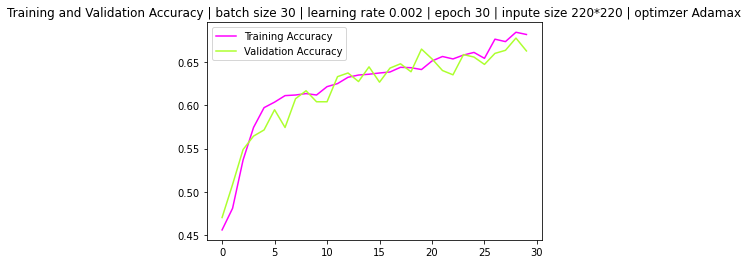

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc7, color ='fuchsia', label='Training Accuracy')
plt.plot(epochs, val_acc7, color ='greenyellow', label='Validation Accuracy')
plt.title('Training and Validation Accuracy | batch size 30 | learning rate 0.002 | epoch 30 | inpute size 220*220 | optimzer Adamax' )
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

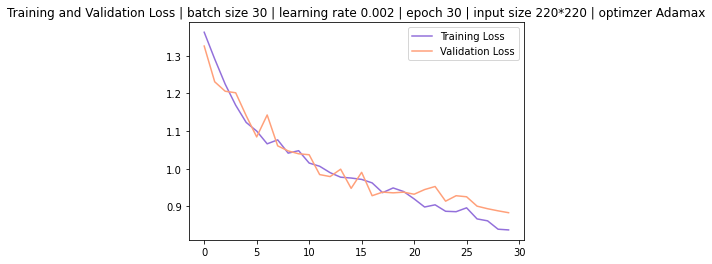

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss7, color ='mediumpurple', label = 'Training Loss')
plt.plot(epochs, val_loss7, color = 'lightsalmon', label = 'Validation Loss')
plt.title('Training and Validation Loss | batch size 30 | learning rate 0.002 | epoch 30 | input size 220*220 | optimzer Adamax')
plt.legend()
plt.figure()